# Classification

In [12]:
# Run this code to make Jupyter print every
# printable statement and not just the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# To visualize the data
import matplotlib.pyplot as plt

# Generic libraries
import seaborn as sns
import pandas as pd
import numpy as np

# Regression models
import sklearn
import scipy
from scipy.stats import *
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV #split the data into training and test
from sklearn.linear_model import LinearRegression #linear regression
from sklearn.preprocessing import PolynomialFeatures #for polynomial regression
from sklearn.metrics import r2_score, mean_squared_error

# 5-folds crossvalidation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, classification_report
from sklearn.pipeline import Pipeline

#classification
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier 

In [2]:
training_set = pd.read_csv("training_set_complete.csv")
test_set = pd.read_csv("test_set_complete.csv")
training_set = training_set.drop(columns=['Unnamed: 0'])
test_set = test_set.drop(columns=['Unnamed: 0'])
training_set['Revenue'] = training_set['Revenue'].astype(int)
test_set['Revenue'] = test_set['Revenue'].astype(int)
training_set['Revenue'].value_counts()
test_set['Revenue'].value_counts()
categorical_features = ['Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6',
       'OperatingSystems_7', 'OperatingSystems_8', 'Browser_1', 'Browser_2',
       'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7',
       'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12',
       'Browser_13', 'Region_1', 'Region_2', 'Region_3', 'Region_4',
       'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
       'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4',
       'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8',
       'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_12',
       'TrafficType_13', 'TrafficType_14', 'TrafficType_15', 'TrafficType_16',
       'TrafficType_17', 'TrafficType_18', 'TrafficType_19', 'TrafficType_20',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True']
training_set[categorical_features] = training_set[categorical_features].astype('category')
test_set[categorical_features] = test_set[categorical_features].astype('category')

0    7807
1    1441
Name: Revenue, dtype: int64

0    2615
1     467
Name: Revenue, dtype: int64

## Logistic regression

In [33]:
X_train_full = training_set.drop(columns=['Revenue'])
X_test_full = test_set.drop(columns=['Revenue'])
y_train = training_set['Revenue']
y_test = test_set['Revenue']

0       0
1       0
2       0
3       0
4       0
       ..
9243    0
9244    0
9245    0
9246    0
9247    0
Name: Month_June, Length: 9248, dtype: category
Categories (2, int64): [0, 1]

In [64]:
from sklearn.feature_selection import VarianceThreshold

# Creazione dell'oggetto VarianceThreshold e specifica della soglia di varianza
threshold = 0.001  # Soglia di varianza desiderata
variance_selector = VarianceThreshold(threshold=threshold)

# Applicazione della selezione della varianza sul dataset

X_train = X_train_full.loc[:, variance_selector.fit(X_train_full).get_support()]
columns_remaining = X_train_full.columns.tolist()

X_test = X_test_full[columns_remaining]
print(X_train.columns.tolist())

['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_6', 'OperatingSystems_8', 'Browser_1', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_10', 'Browser_13', 'Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9', 'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8', 'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_13', 'TrafficType_15', 'TrafficType_19', 'TrafficType_20', 'VisitorType_New_Visitor', 'VisitorType_Other'

#### Scaling data
We scale the numerical features to avoid convergence problem with logistic regression.

In [65]:
# FACCIAMO QUESTO STEP PER EVITARE PROBLEMI DI CONVERGENZA NEL MODELLO
from sklearn.preprocessing import StandardScaler

# Assuming you have your feature data X
numeric_features = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
categorical_features = ['Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 
                        'Month_Nov', 'Month_Oct', 'Month_Sep', 'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_6', 'OperatingSystems_8', 'Browser_1', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_10', 'Browser_13', 'Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_5',
                        'Region_6', 'Region_7', 'Region_8', 'Region_9', 'TrafficType_1', 'TrafficType_2', 
                        'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 
                        'TrafficType_8', 'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_13', 
                        'TrafficType_15', 'TrafficType_19', 'TrafficType_20', 'VisitorType_New_Visitor', 'VisitorType_Other', 'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True']
scaler = StandardScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numeric_features]))
test_scaled = pd.DataFrame(scaler.fit_transform(X_test[numeric_features]))
train_scaled.columns = X_train[numeric_features].columns
test_scaled.columns = X_test[numeric_features].columns
X_train_scaled = pd.concat([train_scaled,X_train[categorical_features]],axis=1)
X_test_scaled = pd.concat([test_scaled,X_test[categorical_features]],axis=1)

We use the solver saga because it's the most suitable for big datasets and supports the l1 penalization.

In [44]:
model = LogisticRegression(solver='newton-cg',max_iter=1000)    # 2- hyperparams
model.fit(X_train_scaled, y_train)                                # 3- model fitting
y_predict = model.predict(X_test_scaled)                        # 4- model testing

def accuracy(y_pred, y_true):
    return (y_pred == y_true).mean()

print("Train accuracy:", accuracy(y_train, model.predict(X_train_scaled)))
print("Test accuracy:", accuracy(y_test, model.predict(X_test_scaled)))
coefficients = model.coef_

cv_accuracy = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='accuracy')
print("Cross-Validated Accuracy:", cv_accuracy)
print("Mean Accuracy:", np.mean(cv_accuracy))

cv_accuracy = cross_val_score(model, X_test_scaled, y_test, cv=10, scoring='accuracy')
print("Cross-Validated Accuracy:", cv_accuracy)
print("Mean Accuracy:", np.mean(cv_accuracy))
print(classification_report(y_test,y_predict))


LogisticRegression(max_iter=1000, solver='newton-cg')

Train accuracy: 0.8833261245674741
Test accuracy: 0.8890330953926022
Cross-Validated Accuracy: [0.87567568 0.88432432 0.88972973 0.87135135 0.88756757 0.89837838
 0.88108108 0.86810811 0.87662338 0.88203463]
Mean Accuracy: 0.8814874224874224
Cross-Validated Accuracy: [0.87055016 0.90291262 0.8961039  0.87337662 0.87012987 0.86688312
 0.85714286 0.88961039 0.87337662 0.87987013]
Mean Accuracy: 0.8779956289665026
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2615
           1       0.76      0.40      0.52       467

    accuracy                           0.89      3082
   macro avg       0.83      0.69      0.73      3082
weighted avg       0.88      0.89      0.87      3082



In [55]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

def get_evaluator(scorer):
    def evaluator(model, X, y, trained=False):
        if not trained:
            model = model.fit(X, y)
        score = scorer(model, X, y)
        return model, score
    return evaluator   

def get_cv_evaluator(scorer, cv=3):
    def evaluator(model, X, y, trained=False):            
        scores = cross_val_score(model, X, y, scoring=scorer, cv=cv)
        if not trained:
            model = model.fit(X, y)
        return model, np.mean(scores)
    
    return evaluator

def get_val_evaluator(scorer, val_size=0.1):
    def evaluator(model, X, y, trained=False):
        X_train_small, X_val, y_train_small, y_val = train_test_split(X, y, 
                                                                      test_size=val_size,
                                                                      random_state=0)
        
        if not trained:
            model = model.fit(X_train_small, y_train_small)
        score = scorer(model, X_val, y_val) 
        
        return model, score
    
    return evaluator


possible_models = {
    "LogisticRegression":LogisticRegression(solver="newton-cg", penalty='none',max_iter=1000),
    "LDA":LDA(),
    "QDA":QDA(),
    "KNN":KNeighborsClassifier(n_neighbors=6),
    "LinearRegression":LinearRegression(fit_intercept=True),
}

def forward_selection(Xtrain_pd, ytrain, Xtest_pd, ytest,model_chosen,
                      candidates_evaluator, candidates_argbest, # Metric to be used at 2.b
                      subsets_evaluator, subsets_argbest,       # Metric to be used at 3
                      test_evaluator=None, test_argbest=None,
                      candidates_scorer_name=None,  # Name of 2. figure
                      subsets_scorer_name=None,     # Name of 3. figure
                      verbose=True, weight_step3=0):   
    test_evaluator = subsets_evaluator if not test_evaluator else test_evaluator
    test_argbest = subsets_argbest if not test_argbest else test_argbest
    
    # Global variable init
    # ====================
    num_features = Xtrain_pd.shape[-1]
    best_candidate_metric = []
    # subsets_* are lists containing one value for each Mk model (the best of the Mk candidates)
    subsets_test = []
    subsets_metric = []        # The best metric of each subset of dimension 'dim'
    subsets_best_features = [] # The best features combination in each subset of dimension 'dim'
    # A figure to keep track of candidates scores in each Mk subset
    plt.figure()
    candidate_fig = plt.subplot(111) # A global matplotlib figure
    num_evaluations = 0        # A conter to keep track of the total number of trials
    
    selected_features = []
    all_features = Xtrain_pd.columns
    
    
    # 1. Train M0
    # ===========
    model = DummyRegressor()
    # Compute (2.b) metrics
    model, score = candidates_evaluator(model, Xtrain_pd[[]], ytrain)
    best_candidate_metric.append(score)
    subsets_best_features.append([])
    _ = candidate_fig.scatter([0], [score], color="b")
    # Compute metric for step 3.
    _, score = subsets_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_metric.append(score)
    _, score = test_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_test.append(score)
    
    
    for dim in range(num_features):
        candidate_metrics = [] # metrics for all the models with dim features
        candidate_models = []  # models with dim features
        
        remaining_features = all_features.difference(selected_features)
        
        # fit all the models with k features
        for new_column in remaining_features:
            Xtrain_sub = Xtrain_pd[selected_features+[new_column]].to_numpy()
            model = possible_models[model_chosen]
            #print(new_column)
            model, score = candidates_evaluator(model, Xtrain_sub, ytrain)
            candidate_models.append(model)
            candidate_metrics.append(score)
            num_evaluations += 1
            
        _ = candidate_fig.scatter([Xtrain_sub.shape[-1]]*len(candidate_metrics), candidate_metrics,
                                  color="b")
        
        idx_best_candidate = candidates_argbest(candidate_metrics) # select the best Mk model
        selected_features.append(remaining_features[idx_best_candidate]) # Update selected feature
        best_candidate_metric.append(candidate_metrics[idx_best_candidate]) # Save best candidate features
        best_features = selected_features.copy()
        subsets_best_features.append(best_features)
        
        
        # Compute metric for the final step -> comparison of all the best models
        best_subset_model = candidate_models[idx_best_candidate] # save the best model
        best_subset_Xtrain = Xtrain_pd[best_features].to_numpy()
        best_subset_Xtest = Xtest_pd[best_features].to_numpy()
        _, score = test_evaluator(best_subset_model, best_subset_Xtest, ytest, trained=True)
        subsets_test.append(score) # computing the metrics for the test set
        _, score = subsets_evaluator(best_subset_model, best_subset_Xtrain, ytrain, trained=True)
        subsets_metric.append(score) #computing the metrics for the training set
        num_evaluations += weight_step3 
        
        if verbose:
            print("............")
            print("Best model (M{}) with {} features: {}".format(dim+1, dim+1, best_features))
            print("M{} subset score (3.): {}".format(dim+1, score))
        
    # choose the best candidates
    best_subset_idx = subsets_argbest(subsets_metric)
    best_features = subsets_best_features[best_subset_idx]
    
    if verbose:
        print("\n Best configuration has {} features".format(best_subset_idx))
        print("Features: {}".format(subsets_best_features[best_subset_idx]))
        print("Total number of trained models:", num_evaluations)
    
    # Complete the subsets_fig figure by plotting
    # a line connecting all best candidate score
    best_candidate_score_idx = candidates_argbest(best_candidate_metric)
    _ = candidate_fig.plot(range(len(best_candidate_metric)), best_candidate_metric)
    _ = candidate_fig.scatter(best_candidate_score_idx, best_candidate_metric[best_candidate_score_idx],
                              marker='X', label="Best", color="r")
    candidate_fig.set_title(candidates_scorer_name)
    candidate_fig.legend()
    
    # Plot a figure to show how te 3. metric evolves
    plt.figure()
    subsets_fig = plt.subplot(111)
    _ = subsets_fig.plot(range(len(subsets_metric)), subsets_metric, label="Selection (3.) scores")
    _ = subsets_fig.scatter(best_subset_idx, subsets_metric[best_subset_idx],
                              marker='X', label="Best (3.) score", color="r")
    best_test_score_idx = test_argbest(subsets_test)
    _ = subsets_fig.plot(range(len(subsets_test)), subsets_test, label="Test scores")
    _ = subsets_fig.scatter(best_test_score_idx, subsets_test[best_test_score_idx],
                              marker='X', label="Best test score", color="y")
    subsets_fig.set_title(subsets_scorer_name)
    subsets_fig.legend()

TypeError: __init__() got an unexpected keyword argument 'shrinkage'

............
Best model (M1) with 1 features: ['PageValues']
M1 subset score (3.): 0.8801909441909442
............
Best model (M2) with 2 features: ['PageValues', 'VisitorType_New_Visitor']
M2 subset score (3.): 0.8822451152451153
............
Best model (M3) with 3 features: ['PageValues', 'VisitorType_New_Visitor', 'TrafficType_3']
M3 subset score (3.): 0.8831102141102141
............
Best model (M4) with 4 features: ['PageValues', 'VisitorType_New_Visitor', 'TrafficType_3', 'TrafficType_10']
M4 subset score (3.): 0.8834343044343044
............
Best model (M5) with 5 features: ['PageValues', 'VisitorType_New_Visitor', 'TrafficType_3', 'TrafficType_10', 'Browser_7']
M5 subset score (3.): 0.8834343044343044
............
Best model (M6) with 6 features: ['PageValues', 'VisitorType_New_Visitor', 'TrafficType_3', 'TrafficType_10', 'Browser_7', 'Region_8']
M6 subset score (3.): 0.8834343044343044
............
Best model (M7) with 7 features: ['PageValues', 'VisitorType_New_Visitor', 'Traf

............
Best model (M28) with 28 features: ['PageValues', 'VisitorType_New_Visitor', 'TrafficType_3', 'TrafficType_10', 'Browser_7', 'Region_8', 'TrafficType_11', 'Browser_3', 'Browser_8', 'Month_Feb', 'Browser_1', 'OperatingSystems_8', 'Region_5', 'Month_Aug', 'TrafficType_7', 'TrafficType_9', 'Region_2', 'Browser_13', 'OperatingSystems_6', 'Browser_4', 'VisitorType_Other', 'Browser_5', 'Region_6', 'TrafficType_15', 'Month_June', 'TrafficType_19', 'VisitorType_Returning_Visitor', 'Browser_10']
M28 subset score (3.): 0.8838672048672048
............
Best model (M29) with 29 features: ['PageValues', 'VisitorType_New_Visitor', 'TrafficType_3', 'TrafficType_10', 'Browser_7', 'Region_8', 'TrafficType_11', 'Browser_3', 'Browser_8', 'Month_Feb', 'Browser_1', 'OperatingSystems_8', 'Region_5', 'Month_Aug', 'TrafficType_7', 'TrafficType_9', 'Region_2', 'Browser_13', 'OperatingSystems_6', 'Browser_4', 'VisitorType_Other', 'Browser_5', 'Region_6', 'TrafficType_15', 'Month_June', 'TrafficType_

............
Best model (M41) with 41 features: ['PageValues', 'VisitorType_New_Visitor', 'TrafficType_3', 'TrafficType_10', 'Browser_7', 'Region_8', 'TrafficType_11', 'Browser_3', 'Browser_8', 'Month_Feb', 'Browser_1', 'OperatingSystems_8', 'Region_5', 'Month_Aug', 'TrafficType_7', 'TrafficType_9', 'Region_2', 'Browser_13', 'OperatingSystems_6', 'Browser_4', 'VisitorType_Other', 'Browser_5', 'Region_6', 'TrafficType_15', 'Month_June', 'TrafficType_19', 'VisitorType_Returning_Visitor', 'Browser_10', 'Month_Jul', 'Region_3', 'Region_7', 'TrafficType_20', 'OperatingSystems_4', 'OperatingSystems_1', 'TrafficType_4', 'TrafficType_5', 'Month_Oct', 'TrafficType_8', 'BounceRates', 'Month_Dec', 'ExitRates']
M41 subset score (3.): 0.8836502866502866
............
Best model (M42) with 42 features: ['PageValues', 'VisitorType_New_Visitor', 'TrafficType_3', 'TrafficType_10', 'Browser_7', 'Region_8', 'TrafficType_11', 'Browser_3', 'Browser_8', 'Month_Feb', 'Browser_1', 'OperatingSystems_8', 'Region

............
Best model (M51) with 51 features: ['PageValues', 'VisitorType_New_Visitor', 'TrafficType_3', 'TrafficType_10', 'Browser_7', 'Region_8', 'TrafficType_11', 'Browser_3', 'Browser_8', 'Month_Feb', 'Browser_1', 'OperatingSystems_8', 'Region_5', 'Month_Aug', 'TrafficType_7', 'TrafficType_9', 'Region_2', 'Browser_13', 'OperatingSystems_6', 'Browser_4', 'VisitorType_Other', 'Browser_5', 'Region_6', 'TrafficType_15', 'Month_June', 'TrafficType_19', 'VisitorType_Returning_Visitor', 'Browser_10', 'Month_Jul', 'Region_3', 'Region_7', 'TrafficType_20', 'OperatingSystems_4', 'OperatingSystems_1', 'TrafficType_4', 'TrafficType_5', 'Month_Oct', 'TrafficType_8', 'BounceRates', 'Month_Dec', 'ExitRates', 'Weekend_False', 'Month_Sep', 'TrafficType_1', 'Region_4', 'Weekend_True', 'TrafficType_6', 'Browser_2', 'Browser_6', 'OperatingSystems_2', 'Administrative_Duration']
M51 subset score (3.): 0.8831103311103311
............
Best model (M52) with 52 features: ['PageValues', 'VisitorType_New_Vi

............
Best model (M60) with 60 features: ['PageValues', 'VisitorType_New_Visitor', 'TrafficType_3', 'TrafficType_10', 'Browser_7', 'Region_8', 'TrafficType_11', 'Browser_3', 'Browser_8', 'Month_Feb', 'Browser_1', 'OperatingSystems_8', 'Region_5', 'Month_Aug', 'TrafficType_7', 'TrafficType_9', 'Region_2', 'Browser_13', 'OperatingSystems_6', 'Browser_4', 'VisitorType_Other', 'Browser_5', 'Region_6', 'TrafficType_15', 'Month_June', 'TrafficType_19', 'VisitorType_Returning_Visitor', 'Browser_10', 'Month_Jul', 'Region_3', 'Region_7', 'TrafficType_20', 'OperatingSystems_4', 'OperatingSystems_1', 'TrafficType_4', 'TrafficType_5', 'Month_Oct', 'TrafficType_8', 'BounceRates', 'Month_Dec', 'ExitRates', 'Weekend_False', 'Month_Sep', 'TrafficType_1', 'Region_4', 'Weekend_True', 'TrafficType_6', 'Browser_2', 'Browser_6', 'OperatingSystems_2', 'Administrative_Duration', 'OperatingSystems_3', 'SpecialDay', 'Region_1', 'Administrative', 'Region_9', 'ProductRelated_Duration', 'ProductRelated', '

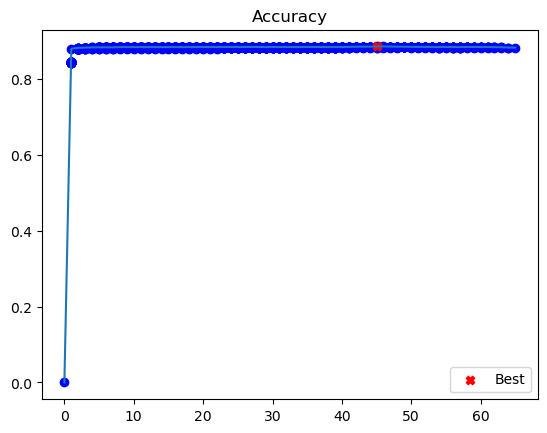

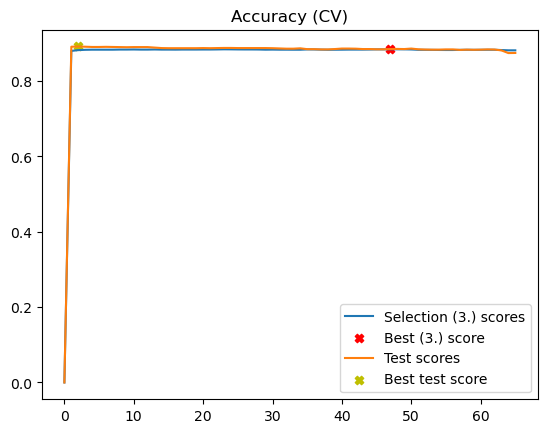

In [98]:
cv = 10
#prima era 10!
forward_selection(X_train_scaled, y_train, X_test_scaled, y_test,"LogisticRegression",
                  get_evaluator(make_scorer(accuracy)), np.argmax, # 2.
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, # 3.
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, # test
                  candidates_scorer_name="Accuracy",
                  subsets_scorer_name="Accuracy (CV)",
                  verbose=True, weight_step3=cv)

In [16]:
features = ['PageValues', 'VisitorType_New_Visitor', 'TrafficType_3', 'TrafficType_10', 'Browser_11', 'Browser_1', 'Browser_12', 'Browser_9', 'OperatingSystems_5', 'OperatingSystems_7', 'Browser_7', 'TrafficType_11', 'Browser_3', 'Month_Feb', 'OperatingSystems_8', 'TrafficType_5', 'Region_8', 'TrafficType_12', 'TrafficType_16', 'Browser_8', 'TrafficType_14', 'TrafficType_17', 'TrafficType_18',
            'TrafficType_7', 'Region_2', 'Browser_13', 'TrafficType_9', 'VisitorType_Other', 'OperatingSystems_6', 'Region_6']

#features = ['PageValues', 'VisitorType_New_Visitor', 'TrafficType_3', 'TrafficType_10', 'Browser_11', 'Browser_1', 'Browser_12', 'Browser_9', 'OperatingSystems_5', 'OperatingSystems_7', 'Browser_7', 'TrafficType_11', 'Browser_3', 'Month_Feb', 'OperatingSystems_8', 'TrafficType_5', 'Region_8', 'TrafficType_12', 'TrafficType_16', 'Browser_8', 'TrafficType_14', 'TrafficType_17', 'TrafficType_18', 'TrafficType_7', 'Region_2', 'Browser_13', 'TrafficType_9', 'VisitorType_Other', 'OperatingSystems_6', 'Region_6', 'Region_3', 'Region_5', 'VisitorType_Returning_Visitor', 'Browser_4', 'Month_June', 'TrafficType_15', 'TrafficType_20', 'TrafficType_19', 'Region_7', 'OperatingSystems_1', 'OperatingSystems_4', 'Browser_5']

Here we apply l1 penalization on the model which contains the best subset of features to see if we can remove some of them.

In [17]:
model = LogisticRegression(solver='saga',penalty='l1',max_iter=1000)    # 2- hyperparams
model.fit(X_train_scaled[features], y_train)                                # 3- model fitting
y_predict = model.predict(X_test_scaled[features])                        # 4- model testing

print("Train accuracy:", accuracy(y_train, model.predict(X_train_scaled[features])))
print("Test accuracy:", accuracy(y_test, model.predict(X_test_scaled[features])))
mask = np.where(model.coef_ != 0,True, False).reshape(len(features))
features = np.array(features)
filtered_features = features[mask]
filtered_features

model = LogisticRegression(solver='saga',penalty='l1',max_iter=1000)    # 2- hyperparams
model.fit(X_train_scaled[filtered_features], y_train)                                # 3- model fitting
y_predict = model.predict(X_test_scaled[filtered_features]) 
print("Train accuracy:", accuracy(y_train, model.predict(X_train_scaled[filtered_features])))
print("Test accuracy:", accuracy(y_test, model.predict(X_test_scaled[filtered_features])))

LogisticRegression(max_iter=1000, penalty='l1', solver='saga')

Train accuracy: 0.884083044982699
Test accuracy: 0.890979883192732


array(['PageValues', 'VisitorType_New_Visitor', 'TrafficType_3',
       'TrafficType_10', 'TrafficType_11', 'Browser_3', 'Month_Feb',
       'TrafficType_5', 'Browser_8', 'Region_2', 'Browser_13',
       'VisitorType_Other', 'OperatingSystems_6', 'Region_6'],
      dtype='<U23')

LogisticRegression(max_iter=1000, penalty='l1', solver='saga')

Train accuracy: 0.884083044982699
Test accuracy: 0.890979883192732


# LDA

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model = LDA()
model = model.fit(X_train_full[['Administrative']], y_train)

print("Train accuracy:", accuracy(y_train, model.predict(X_train_full[['Administrative']])))
print("Test accuracy:", accuracy(y_test, model.predict(X_test_full[['Administrative']])))

Train accuracy: 0.8423442906574394
Test accuracy: 0.8471771576898118


In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('lda', LDA(store_covariance=True))])
model = model.fit(X_train_full, y_train)

print("Train accuracy:", accuracy(y_train, model.predict(X_train_full)))
print("Test accuracy:", accuracy(y_test, model.predict(X_test_full)))

Train accuracy: 0.9083044982698962
Test accuracy: 0.8828682673588579


In [47]:
for col in X_train_scaled.columns:
    X_train_scaled[col].value_counts()
    X_test_scaled[col].value_counts()

-0.696623    4333
-0.394193    1019
-0.091763     844
 0.210668     682
 0.513098     581
 0.815529     418
 1.117959     318
 1.420390     246
 1.722820     219
 2.025251     166
 2.327681     124
 2.630112      80
 2.932542      60
 3.234973      44
 3.537403      34
 3.839834      30
 4.142264      15
 4.444694      10
 4.747125       9
 5.049555       6
 6.259277       3
 5.956847       2
 6.561708       2
 5.654416       1
 7.166569       1
 7.468999       1
Name: Administrative, dtype: int64

-0.698217    1435
-0.401157     335
-0.104096     270
 0.192964     233
 0.490024     184
 0.787085     157
 1.084145     114
 1.381205      92
 1.678266      68
 1.975326      59
 2.272387      29
 2.866507      26
 2.569447      25
 3.163568      12
 3.460628      10
 4.054749       9
 3.757688       8
 4.351809       6
 4.648870       3
 6.431232       2
 5.837111       2
 5.242990       2
 5.540051       1
Name: Administrative, dtype: int64

-0.459916    4436
-0.436701      42
-0.430897      40
-0.419290      33
-0.396075      30
             ... 
 5.192936       1
 0.143287       1
 1.638720       1
 1.026424       1
 0.020054       1
Name: Administrative_Duration, Length: 2637, dtype: int64

-0.451470    1467
-0.419804      15
-0.430359      14
-0.425082      13
-0.393415      12
             ... 
 0.157586       1
 0.198753       1
-0.265165       1
 2.879379       1
 1.497792       1
Name: Administrative_Duration, Length: 1137, dtype: int64

-0.401006     7258
 0.397724      808
 1.196455      549
 1.995186      268
 2.793917      172
 3.592647       72
 4.391378       57
 5.190109       28
 6.787570       13
 5.988840        9
 7.586301        6
 9.183763        5
 10.781224       1
 8.385032        1
 9.982493        1
Name: Informational, dtype: int64

-0.384068     2441
 0.371805      233
 1.127678      179
 1.883551      112
 2.639424       50
 3.395298       27
 4.151171       21
 4.907044        8
 5.662917        5
 6.418790        2
 11.709901       1
 17.756886       1
 10.198155       1
 7.174663        1
Name: Informational, dtype: int64

-0.248909    7425
-0.184727      26
-0.206121      23
-0.198990      23
-0.156202      18
             ... 
 0.486806       1
 3.446902       1
 2.083035       1
 0.859121       1
 1.081084       1
Name: Informational_Duration, Length: 1027, dtype: int64

-0.233198    2500
-0.162912      10
-0.106683       8
-0.127769       8
-0.169940       7
             ... 
 0.063408       1
 0.333305       1
 0.615853       1
 0.652402       1
 1.351744       1
Name: Informational_Duration, Length: 438, dtype: int64

-0.696682    473
-0.673986    351
-0.651289    346
-0.628593    308
-0.605897    293
            ... 
 7.837162      1
 5.045506      1
 6.679646      1
 4.410007      1
 2.912045      1
Name: ProductRelated, Length: 284, dtype: int64

-0.674914    149
-0.565488    116
-0.653029    114
-0.631144    112
-0.543603    100
            ... 
 3.767796      1
 4.336814      1
 4.380584      1
 4.796404      1
 2.213942      1
Name: ProductRelated, Length: 206, dtype: int64

-0.660707    590
-0.650101     12
-0.652892     12
-0.654009     12
-0.654567     12
            ... 
 0.242751      1
-0.140985      1
-0.480265      1
-0.279262      1
-0.168804      1
Name: ProductRelated_Duration, Length: 7358, dtype: int64

-0.548265    165
-0.540677      9
-0.542462      6
-0.537552      6
-0.543355      5
            ... 
-0.299500      1
 1.159063      1
 1.076326      1
-0.394572      1
-0.466025      1
Name: ProductRelated_Duration, Length: 2669, dtype: int64

-0.460505    4105
 3.606271     545
 0.895087     106
 0.556189      89
 0.120463      88
             ... 
-0.263578       1
-0.452546       1
-0.341593       1
-0.330188       1
-0.182720       1
Name: BounceRates, Length: 1551, dtype: int64

-0.449572    1413
 3.868316     155
 0.989724      28
-0.089748      28
-0.057037      27
             ... 
-0.137093       1
 0.002300       1
-0.239675       1
 0.136808       1
-0.430799       1
Name: BounceRates, Length: 651, dtype: int64

 3.246639    362
 0.136630    180
 1.173300    169
-0.208927    150
 0.482186    132
            ... 
-0.620491      1
 0.697744      1
-0.333285      1
 0.217693      1
-0.631039      1
Name: ExitRates, Length: 4995, dtype: int64

 3.419557    102
 1.257278     62
 0.176139     57
-0.364431     53
-0.184241     49
            ... 
 0.775019      1
-0.406162      1
 0.481002      1
 0.508620      1
 0.968974      1
Name: ExitRates, Length: 1922, dtype: int64

-0.316639    7184
 2.609945       5
 1.975986       3
 1.866761       2
 0.364152       2
             ... 
 0.217300       1
 0.233710       1
 0.342103       1
 2.237891       1
 0.135411       1
Name: PageValues, Length: 2043, dtype: int64

-0.318842    2416
-0.029097       1
 0.680783       1
-0.216561       1
 0.114062       1
             ... 
 0.313397       1
 2.755023       1
 0.531473       1
 0.996847       1
 0.058875       1
Name: PageValues, Length: 667, dtype: int64

-0.311980    8293
 2.681996     267
 3.679988     250
 1.684004     188
 0.686012     134
 4.677980     116
Name: SpecialDay, dtype: int64

-0.299214    2786
 2.788431      84
 3.817646      75
 1.759216      55
 0.730001      44
 4.846861      38
Name: SpecialDay, dtype: int64

0    8918
1     330
Name: Month_Aug, dtype: int64

0    2979
1     103
Name: Month_Aug, dtype: int64

0    7967
1    1281
Name: Month_Dec, dtype: int64

0    2636
1     446
Name: Month_Dec, dtype: int64

0    9108
1     140
Name: Month_Feb, dtype: int64

0    3038
1      44
Name: Month_Feb, dtype: int64

0    8930
1     318
Name: Month_Jul, dtype: int64

0    2968
1     114
Name: Month_Jul, dtype: int64

0    9040
1     208
Name: Month_June, dtype: int64

0    3002
1      80
Name: Month_June, dtype: int64

0    7825
1    1423
Name: Month_Mar, dtype: int64

0    2598
1     484
Name: Month_Mar, dtype: int64

0    6718
1    2530
Name: Month_May, dtype: int64

0    2248
1     834
Name: Month_May, dtype: int64

0    6988
1    2260
Name: Month_Nov, dtype: int64

0    2344
1     738
Name: Month_Nov, dtype: int64

0    8841
1     407
Name: Month_Oct, dtype: int64

0    2940
1     142
Name: Month_Oct, dtype: int64

0    8897
1     351
Name: Month_Sep, dtype: int64

0    2985
1      97
Name: Month_Sep, dtype: int64

0    7317
1    1931
Name: OperatingSystems_1, dtype: int64

0    2428
1     654
Name: OperatingSystems_1, dtype: int64

1    4949
0    4299
Name: OperatingSystems_2, dtype: int64

1    1652
0    1430
Name: OperatingSystems_2, dtype: int64

0    7314
1    1934
Name: OperatingSystems_3, dtype: int64

0    2461
1     621
Name: OperatingSystems_3, dtype: int64

0    8893
1     355
Name: OperatingSystems_4, dtype: int64

0    2959
1     123
Name: OperatingSystems_4, dtype: int64

0    9231
1      17
Name: OperatingSystems_6, dtype: int64

0    3080
1       2
Name: OperatingSystems_6, dtype: int64

0    9193
1      55
Name: OperatingSystems_8, dtype: int64

0    3058
1      24
Name: OperatingSystems_8, dtype: int64

0    7421
1    1827
Name: Browser_1, dtype: int64

0    2447
1     635
Name: Browser_1, dtype: int64

1    5973
0    3275
Name: Browser_2, dtype: int64

1    1988
0    1094
Name: Browser_2, dtype: int64

0    9176
1      72
Name: Browser_3, dtype: int64

0    3049
1      33
Name: Browser_3, dtype: int64

0    8686
1     562
Name: Browser_4, dtype: int64

0    2908
1     174
Name: Browser_4, dtype: int64

0    8890
1     358
Name: Browser_5, dtype: int64

0    2973
1     109
Name: Browser_5, dtype: int64

0    9112
1     136
Name: Browser_6, dtype: int64

0    3044
1      38
Name: Browser_6, dtype: int64

0    9209
1      39
Name: Browser_7, dtype: int64

0    3072
1      10
Name: Browser_7, dtype: int64

0    9142
1     106
Name: Browser_8, dtype: int64

0    3053
1      29
Name: Browser_8, dtype: int64

0    9123
1     125
Name: Browser_10, dtype: int64

0    3044
1      38
Name: Browser_10, dtype: int64

0    9208
1      40
Name: Browser_13, dtype: int64

0    3061
1      21
Name: Browser_13, dtype: int64

0    5667
1    3581
Name: Region_1, dtype: int64

0    1883
1    1199
Name: Region_1, dtype: int64

0    8388
1     860
Name: Region_2, dtype: int64

0    2806
1     276
Name: Region_2, dtype: int64

0    7402
1    1846
Name: Region_3, dtype: int64

0    2525
1     557
Name: Region_3, dtype: int64

0    8363
1     885
Name: Region_4, dtype: int64

0    2785
1     297
Name: Region_4, dtype: int64

0    9022
1     226
Name: Region_5, dtype: int64

0    2990
1      92
Name: Region_5, dtype: int64

0    8668
1     580
Name: Region_6, dtype: int64

0    2857
1     225
Name: Region_6, dtype: int64

0    8675
1     573
Name: Region_7, dtype: int64

0    2894
1     188
Name: Region_7, dtype: int64

0    8927
1     321
Name: Region_8, dtype: int64

0    2969
1     113
Name: Region_8, dtype: int64

0    8872
1     376
Name: Region_9, dtype: int64

0    2947
1     135
Name: Region_9, dtype: int64

0    7403
1    1845
Name: TrafficType_1, dtype: int64

0    2476
1     606
Name: TrafficType_1, dtype: int64

0    6274
1    2974
Name: TrafficType_2, dtype: int64

0    2143
1     939
Name: TrafficType_2, dtype: int64

0    7736
1    1512
Name: TrafficType_3, dtype: int64

0    2542
1     540
Name: TrafficType_3, dtype: int64

0    8444
1     804
Name: TrafficType_4, dtype: int64

0    2817
1     265
Name: TrafficType_4, dtype: int64

0    9038
1     210
Name: TrafficType_5, dtype: int64

0    3032
1      50
Name: TrafficType_5, dtype: int64

0    8928
1     320
Name: TrafficType_6, dtype: int64

0    2958
1     124
Name: TrafficType_6, dtype: int64

0    9220
1      28
Name: TrafficType_7, dtype: int64

0    3070
1      12
Name: TrafficType_7, dtype: int64

0    8992
1     256
Name: TrafficType_8, dtype: int64

0    2995
1      87
Name: TrafficType_8, dtype: int64

0    9217
1      31
Name: TrafficType_9, dtype: int64

0    3071
1      11
Name: TrafficType_9, dtype: int64

0    8915
1     333
Name: TrafficType_10, dtype: int64

0    2965
1     117
Name: TrafficType_10, dtype: int64

0    9072
1     176
Name: TrafficType_11, dtype: int64

0    3011
1      71
Name: TrafficType_11, dtype: int64

0    8690
1     558
Name: TrafficType_13, dtype: int64

0    2902
1     180
Name: TrafficType_13, dtype: int64

0    9222
1      26
Name: TrafficType_15, dtype: int64

0    3070
1      12
Name: TrafficType_15, dtype: int64

0    9236
1      12
Name: TrafficType_19, dtype: int64

0    3077
1       5
Name: TrafficType_19, dtype: int64

0    9104
1     144
Name: TrafficType_20, dtype: int64

0    3028
1      54
Name: TrafficType_20, dtype: int64

0    7959
1    1289
Name: VisitorType_New_Visitor, dtype: int64

0    2677
1     405
Name: VisitorType_New_Visitor, dtype: int64

0    9182
1      66
Name: VisitorType_Other, dtype: int64

0    3063
1      19
Name: VisitorType_Other, dtype: int64

1    7893
0    1355
Name: VisitorType_Returning_Visitor, dtype: int64

1    2658
0     424
Name: VisitorType_Returning_Visitor, dtype: int64

1    7126
0    2122
Name: Weekend_False, dtype: int64

1    2336
0     746
Name: Weekend_False, dtype: int64

0    7126
1    2122
Name: Weekend_True, dtype: int64

0    2336
1     746
Name: Weekend_True, dtype: int64

............
Best model (M1) with 1 features: ['PageValues']
M1 subset score (3.): 0.8765136450674579
............
Best model (M2) with 2 features: ['PageValues', 'ExitRates']
M2 subset score (3.): 0.8793249236256268
............
Best model (M3) with 3 features: ['PageValues', 'ExitRates', 'BounceRates']
M3 subset score (3.): 0.8788923157879351
............
Best model (M4) with 4 features: ['PageValues', 'ExitRates', 'BounceRates', 'Month_Oct']
M4 subset score (3.): 0.8790004238960432
............
Best model (M5) with 5 features: ['PageValues', 'ExitRates', 'BounceRates', 'Month_Oct', 'VisitorType_Other']
M5 subset score (3.): 0.879324865157207
............
Best model (M6) with 6 features: ['PageValues', 'ExitRates', 'BounceRates', 'Month_Oct', 'VisitorType_Other', 'TrafficType_5']
M6 subset score (3.): 0.8790005408328826
............
Best model (M7) with 7 features: ['PageValues', 'ExitRates', 'BounceRates', 'Month_Oct', 'VisitorType_Other', 'TrafficType_5', 'OperatingSystems_1']
M7 s

............
Best model (M28) with 28 features: ['PageValues', 'ExitRates', 'BounceRates', 'Month_Oct', 'VisitorType_Other', 'TrafficType_5', 'OperatingSystems_1', 'Browser_3', 'Browser_7', 'Browser_8', 'Month_Aug', 'Month_Sep', 'OperatingSystems_4', 'Month_Feb', 'Region_3', 'Browser_4', 'Region_7', 'TrafficType_11', 'TrafficType_10', 'OperatingSystems_6', 'OperatingSystems_8', 'Region_5', 'Region_6', 'TrafficType_15', 'TrafficType_19', 'TrafficType_4', 'Browser_5', 'TrafficType_6']
M28 subset score (3.): 0.8804061216435473
............
Best model (M29) with 29 features: ['PageValues', 'ExitRates', 'BounceRates', 'Month_Oct', 'VisitorType_Other', 'TrafficType_5', 'OperatingSystems_1', 'Browser_3', 'Browser_7', 'Browser_8', 'Month_Aug', 'Month_Sep', 'OperatingSystems_4', 'Month_Feb', 'Region_3', 'Browser_4', 'Region_7', 'TrafficType_11', 'TrafficType_10', 'OperatingSystems_6', 'OperatingSystems_8', 'Region_5', 'Region_6', 'TrafficType_15', 'TrafficType_19', 'TrafficType_4', 'Browser_5',

............
Best model (M42) with 42 features: ['PageValues', 'ExitRates', 'BounceRates', 'Month_Oct', 'VisitorType_Other', 'TrafficType_5', 'OperatingSystems_1', 'Browser_3', 'Browser_7', 'Browser_8', 'Month_Aug', 'Month_Sep', 'OperatingSystems_4', 'Month_Feb', 'Region_3', 'Browser_4', 'Region_7', 'TrafficType_11', 'TrafficType_10', 'OperatingSystems_6', 'OperatingSystems_8', 'Region_5', 'Region_6', 'TrafficType_15', 'TrafficType_19', 'TrafficType_4', 'Browser_5', 'TrafficType_6', 'Month_Jul', 'TrafficType_7', 'TrafficType_9', 'Browser_13', 'Browser_10', 'Month_Mar', 'TrafficType_8', 'Region_2', 'Browser_2', 'Month_June', 'TrafficType_13', 'Region_4', 'Weekend_False', 'Weekend_True']
M42 subset score (3.): 0.8805143466884949
............
Best model (M43) with 43 features: ['PageValues', 'ExitRates', 'BounceRates', 'Month_Oct', 'VisitorType_Other', 'TrafficType_5', 'OperatingSystems_1', 'Browser_3', 'Browser_7', 'Browser_8', 'Month_Aug', 'Month_Sep', 'OperatingSystems_4', 'Month_Feb',

............
Best model (M52) with 52 features: ['PageValues', 'ExitRates', 'BounceRates', 'Month_Oct', 'VisitorType_Other', 'TrafficType_5', 'OperatingSystems_1', 'Browser_3', 'Browser_7', 'Browser_8', 'Month_Aug', 'Month_Sep', 'OperatingSystems_4', 'Month_Feb', 'Region_3', 'Browser_4', 'Region_7', 'TrafficType_11', 'TrafficType_10', 'OperatingSystems_6', 'OperatingSystems_8', 'Region_5', 'Region_6', 'TrafficType_15', 'TrafficType_19', 'TrafficType_4', 'Browser_5', 'TrafficType_6', 'Month_Jul', 'TrafficType_7', 'TrafficType_9', 'Browser_13', 'Browser_10', 'Month_Mar', 'TrafficType_8', 'Region_2', 'Browser_2', 'Month_June', 'TrafficType_13', 'Region_4', 'Weekend_False', 'Weekend_True', 'Browser_1', 'Browser_6', 'Region_8', 'VisitorType_New_Visitor', 'Informational_Duration', 'VisitorType_Returning_Visitor', 'OperatingSystems_2', 'Month_Dec', 'TrafficType_20', 'TrafficType_1']
M52 subset score (3.): 0.8802978965985997
............
Best model (M53) with 53 features: ['PageValues', 'ExitR

............
Best model (M61) with 61 features: ['PageValues', 'ExitRates', 'BounceRates', 'Month_Oct', 'VisitorType_Other', 'TrafficType_5', 'OperatingSystems_1', 'Browser_3', 'Browser_7', 'Browser_8', 'Month_Aug', 'Month_Sep', 'OperatingSystems_4', 'Month_Feb', 'Region_3', 'Browser_4', 'Region_7', 'TrafficType_11', 'TrafficType_10', 'OperatingSystems_6', 'OperatingSystems_8', 'Region_5', 'Region_6', 'TrafficType_15', 'TrafficType_19', 'TrafficType_4', 'Browser_5', 'TrafficType_6', 'Month_Jul', 'TrafficType_7', 'TrafficType_9', 'Browser_13', 'Browser_10', 'Month_Mar', 'TrafficType_8', 'Region_2', 'Browser_2', 'Month_June', 'TrafficType_13', 'Region_4', 'Weekend_False', 'Weekend_True', 'Browser_1', 'Browser_6', 'Region_8', 'VisitorType_New_Visitor', 'Informational_Duration', 'VisitorType_Returning_Visitor', 'OperatingSystems_2', 'Month_Dec', 'TrafficType_20', 'TrafficType_1', 'OperatingSystems_3', 'Administrative_Duration', 'Informational', 'SpecialDay', 'Administrative', 'Month_May', 

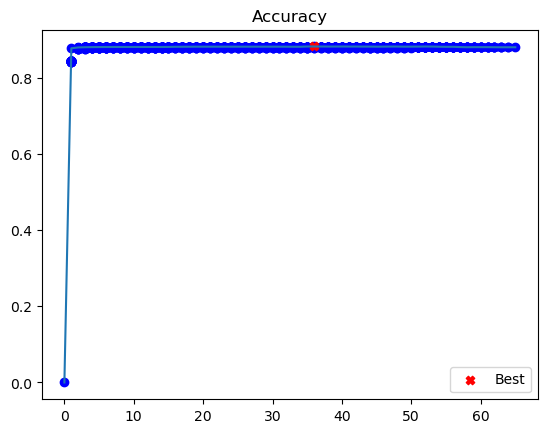

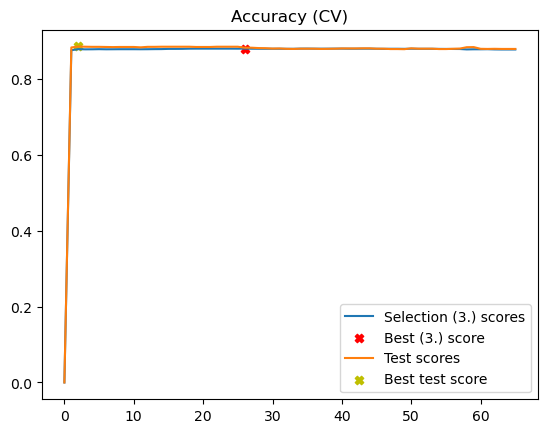

In [51]:
cv = 5
#prima era 10!
# qui sono stata costretta a togliere browser 9... Il motivo? bella domanda... ad un certo punto dava problemi
forward_selection(X_train_scaled, y_train, X_test_scaled, y_test,"LDA",
                  get_evaluator(make_scorer(accuracy)), np.argmax, # 2.
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, # 3.
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, # test
                  candidates_scorer_name="Accuracy",
                  subsets_scorer_name="Accuracy (CV)",
                  verbose=True, weight_step3=cv)

In [79]:
# Define a mesh grid over the feature space

features = ['PageValues', 'ExitRates', 'BounceRates', 'Month_Oct', 'VisitorType_Other', 'TrafficType_5',
            'OperatingSystems_1', 'Browser_3', 'Browser_7', 'Browser_8', 'Month_Aug', 'Month_Sep', 'OperatingSystems_4',
            'Month_Feb', 'Region_3', 'Browser_4', 'Region_7', 'TrafficType_11', 'TrafficType_10', 'OperatingSystems_6',
            'OperatingSystems_8', 'Region_5', 'Region_6', 'TrafficType_15', 'TrafficType_19', 'TrafficType_4']

LinearDiscriminantAnalysis()

InvalidIndexError: (slice(None, None, None), 0)

In [69]:
from sklearn.model_selection import GridSearchCV

model = Pipeline([('poly', PolynomialFeatures()),
                  ('lda', LDA(store_covariance=True))])
params = {'poly__degree': range(1, 6)}
cv = GridSearchCV(model, params, refit=True, cv=10, 
                  scoring=make_scorer(accuracy))
cv.fit(X_train_full, y_train)

KeyboardInterrupt: 

## QDA

In [71]:
# APPLICO PCA 
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Calcola la percentuale di varianza spiegata cumulativa
explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)

# Trova il numero di componenti che catturano il 95% della varianza
n_components = np.argmax(explained_variance_ratio_cumsum >= 0.95) + 1
n_components
# Riduci la dimensionalità del dataset utilizzando il numero selezionato di componenti principali
pca = PCA(n_components=n_components)
X_train_pca = pd.DataFrame(pca.fit_transform(X_train_scaled))
X_test_pca = pd.DataFrame(pca.transform(X_test_scaled))

27

In [73]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
model = QDA(store_covariance=True)
model = model.fit(X_train_pca, y_train)

print("Train accuracy:", accuracy(y_train, model.predict(X_train_pca)))
print("Test accuracy:", accuracy(y_test, model.predict(X_test_pca)))

Train accuracy: 0.8276384083044983
Test accuracy: 0.8403634003893575


............
Best model (M1) with 1 features: [5]
M1 subset score (3.): 0.868404133717276
............
Best model (M2) with 2 features: [5, 1]
M2 subset score (3.): 0.8821364360574744
............
Best model (M3) with 3 features: [5, 1, 15]
M3 subset score (3.): 0.8821363191206351
............
Best model (M4) with 4 features: [5, 1, 15, 4]
M4 subset score (3.): 0.8840824989402598
............
Best model (M5) with 5 features: [5, 1, 15, 4, 8]
M5 subset score (3.): 0.885055705786912
............
Best model (M6) with 6 features: [5, 1, 15, 4, 8, 12]
M6 subset score (3.): 0.8847313229941678
............
Best model (M7) with 7 features: [5, 1, 15, 4, 8, 12, 26]
M7 subset score (3.): 0.8849475976788037
............
Best model (M8) with 8 features: [5, 1, 15, 4, 8, 12, 26, 18]
M8 subset score (3.): 0.8854881382193444
............
Best model (M9) with 9 features: [5, 1, 15, 4, 8, 12, 26, 18, 10]
M9 subset score (3.): 0.8846231564176399
............
Best model (M10) with 10 features: [5, 1, 15,

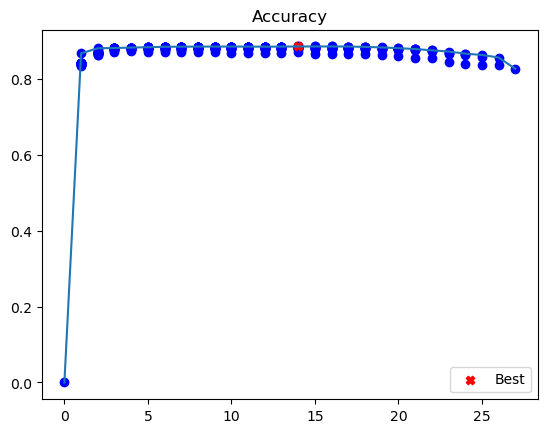

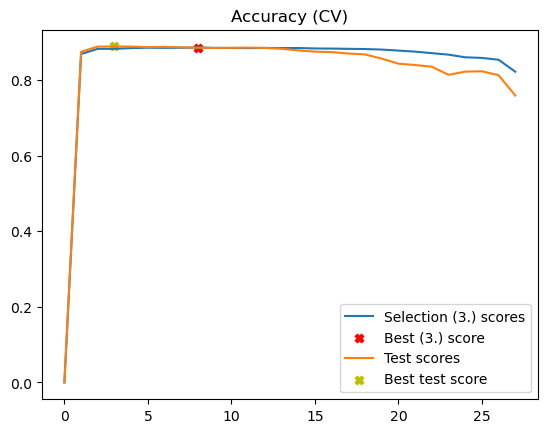

In [74]:
cv = 5
#prima era 10!
# qui sono stata costretta a togliere browser 9... Il motivo? bella domanda... ad un certo punto dava problemi
forward_selection(X_train_pca, y_train, X_test_pca, y_test,"QDA",
                  get_evaluator(make_scorer(accuracy)), np.argmax, # 2.
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, # 3.
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, # test
                  candidates_scorer_name="Accuracy",
                  subsets_scorer_name="Accuracy (CV)",
                  verbose=True, weight_step3=cv)

In [75]:
model = QDA(store_covariance=True)
model = model.fit(X_train_pca[[5, 1, 15, 4, 8, 12, 26, 18]], y_train)
y_predict=model.predict(X_test_pca[[5, 1, 15, 4, 8, 12, 26, 18]])
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2615
           1       0.81      0.40      0.54       467

    accuracy                           0.90      3082
   macro avg       0.86      0.69      0.74      3082
weighted avg       0.89      0.90      0.88      3082



## KNN

In [94]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [95]:
# Train a KNN with different k values
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train_full, y_train)

print("Train accuracy:", accuracy(y_train, model.predict(X_train_full)))
print("Test accuracy:", accuracy(y_test, model.predict(X_test_full)))

KNeighborsClassifier(n_neighbors=6)

Train accuracy: 0.8831098615916955
Test accuracy: 0.8754055807916937


In [77]:
model = KNeighborsClassifier()
params = {'n_neighbors': range(1, 15)}
cv = GridSearchCV(model, params, refit=True, cv=10, 
                  scoring=make_scorer(accuracy))
cv.fit(X_train_full, y_train)
cv.best_params_

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 15)},
             scoring=make_scorer(accuracy))

{'n_neighbors': 6}

............
Best model (M1) with 1 features: ['PageValues']
M1 subset score (3.): 0.8793254498414044
............
Best model (M2) with 2 features: ['PageValues', 'VisitorType_Returning_Visitor']
M2 subset score (3.): 0.882136552994314
............
Best model (M3) with 3 features: ['PageValues', 'VisitorType_Returning_Visitor', 'ExitRates']
M3 subset score (3.): 0.8814877874088258
............
Best model (M4) with 4 features: ['PageValues', 'VisitorType_Returning_Visitor', 'ExitRates', 'OperatingSystems_6']
M4 subset score (3.): 0.8814878458772457
............
Best model (M5) with 5 features: ['PageValues', 'VisitorType_Returning_Visitor', 'ExitRates', 'OperatingSystems_6', 'Month_June']
M5 subset score (3.): 0.8810551795711341
............
Best model (M6) with 6 features: ['PageValues', 'VisitorType_Returning_Visitor', 'ExitRates', 'OperatingSystems_6', 'Month_June', 'TrafficType_20']
M6 subset score (3.): 0.881704003625042
............
Best model (M7) with 7 features: ['PageValues', 

KeyboardInterrupt: 

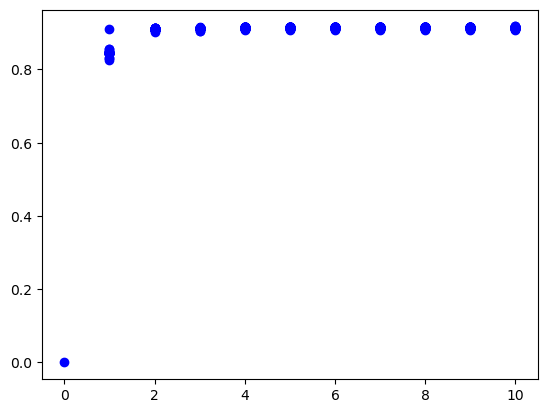

In [96]:
cv = 5
#prima era 10!
forward_selection(X_train_scaled, y_train, X_test_scaled, y_test,"KNN",
                  get_evaluator(make_scorer(accuracy)), np.argmax, # 2.
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, # 3.
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, # test
                  candidates_scorer_name="Accuracy",
                  subsets_scorer_name="Accuracy (CV)",
                  verbose=True, weight_step3=cv)

In [97]:
from matplotlib.colors import ListedColormap

def show_boundary(model, X, y=None):
    if not isinstance(X, np.ndarray):
        X = np.array(X)
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    # Note: we add a small margin (of 1) around the min and max
    max_x, min_x = X[:, 0].max()+X[:, 0].ptp()/3, X[:, 0].min()-X[:, 0].ptp()/3
    max_y, min_y = X[:, 1].max()+X[:, 1].ptp()/3, X[:, 1].min()-X[:, 1].ptp()/3
    # Create a fake dataset to evaluate the KNN output in each
    # point of the 2D space
    # 1- Create a grid of coordinates
    xx, yy = np.meshgrid(np.linspace(min_x, max_x, 300),
                         np.linspace(min_y, max_y, 300))

    # 2- Stack the coordinates to create a fake dataset to evaluate
    X_grid= np.stack([xx.reshape(-1), yy.reshape(-1)], axis=-1)
    # 3- Predict the KNN output in each point
    predict_grid = model.predict(X_grid)

    # 3- Put the result into a color plot
    predict_grid = predict_grid.reshape(xx.shape)
    plt.figure()
    # Create a color map associating colors to labels
    cmap_light = ListedColormap(['#AAAAFF', '#FFAAAA'])
    cmap_solid = ListedColormap(['#0000FF', '#FF0000'])
    plt.pcolormesh(xx, yy, predict_grid,
                   cmap=cmap_light, norm=colors.Normalize(0., 1.))
    plt.contour(xx, yy, predict_grid, [0.5], colors='grey')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_solid)
    
    # plt.xlim(50,70)
    # plt.ylim(40,60)

show_boundary(model, X_train_scaled, y_train)

ValueError: X has 2 features, but KNeighborsClassifier is expecting 75 features as input.